In [1]:
print("abcs")

abcs


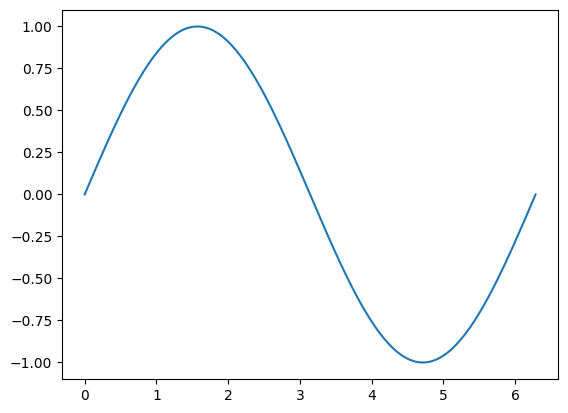

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 2*np.pi, 200)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x,y)
plt.show()

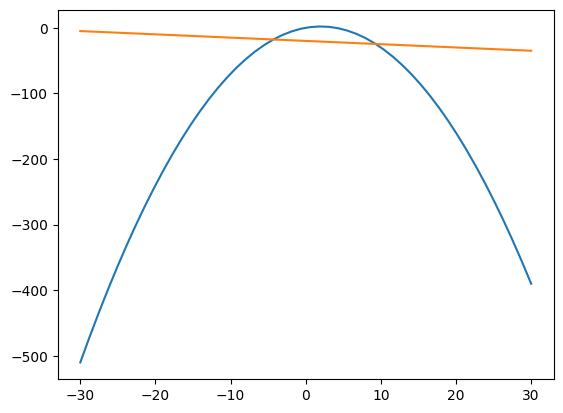

In [2]:
x = np.linspace(-30,30)
a = -0.5
b = 2
c = 0
y = a*x**2 + b*x + c

fig2, ax2 = plt.subplots()
ax2.plot(x,y)
y = a*x +b*-10
ax2.plot(x,y)
plt.show()

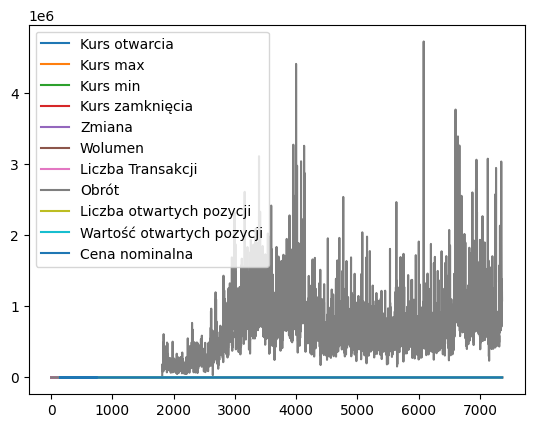

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("data_source/wig20_to_2023-11-06_indeksy.xls")

df.plot()
plt.show()

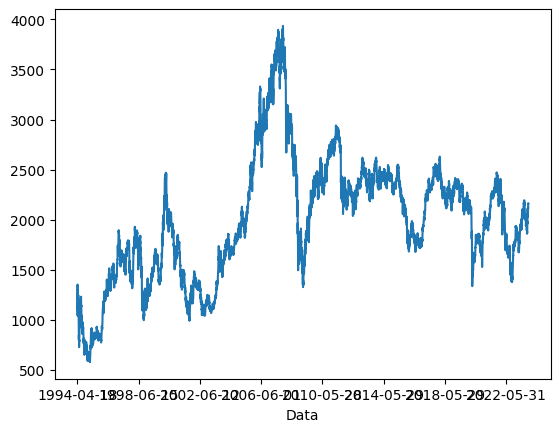

In [5]:
df = pd.read_excel("data_source/wig20_to_2023-11-06_indeksy.xls", index_col=0)

df['Kurs otwarcia'].plot()
plt.show()

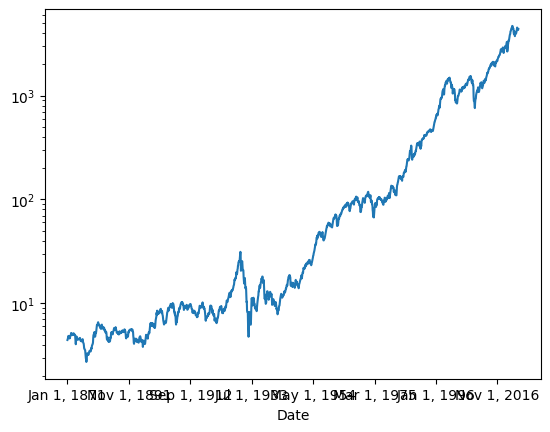

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

snp500 = pd.read_csv("data_source/SnP_500_Historical_Data.csv", index_col=0)
snp500 = snp500.iloc[::-1]
snp500['Price '].plot()
plt.yscale("log")
plt.show()

In [7]:
def best_gain(series, iterations):
    best_gain = -1.
    best_begin = 0
    for i in range(len(series)-iterations):
        gain = series.iloc[i+iterations]/series.iloc[i]
        if gain > best_gain:
            best_gain = gain
            best_begin = i

    return best_gain, best_begin

def worst_gain(series, iterations):
    worst_gain = 1000000.
    worst_begin = 0
    for i in range(len(series)-iterations):
        gain = series.iloc[i+iterations]/series.iloc[i]
        if gain < worst_gain:
            worst_gain = gain
            worst_begin = i

    return worst_gain, worst_begin

period = 360 # 30 years
bg, bi = best_gain(snp500['Price '], period)
wg, wi = worst_gain(snp500['Price '], period)

print(f"Best gain: {bg*100}%, worst: {wg*100}%")

Best gain: 1945.324881141046%, worst: 56.71819262782402%


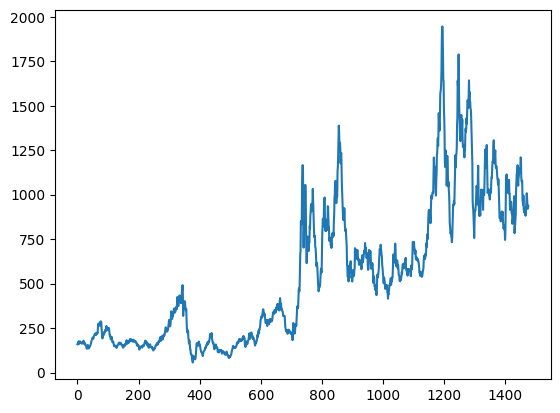

In [8]:
def calc_gains(series, iterations):
    gains = []
    for i in range(len(series)-iterations):
        gains.append(series.iloc[i+iterations]*100/series.iloc[i])

    return gains

gains = calc_gains(snp500['Price '], period)

plt.plot(range(len(gains)), gains)
plt.show()